## TUIA 4° cuatrimestre

# Minería de Datos

## Trabajo Práctico N°3

## Integrantes: Menescaldi Brisa, Vercesi Patricio

### Preprocesamiento

#### Importaciones

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix,classification_report classification_report
import warnings
warnings.filterwarnings('ignore')

In [ ]:
files.upload();

Saving CoffeeRatings.csv to CoffeeRatings.csv


#### Exploración de datos

In [ ]:
df = pd.read_csv('CoffeeRatings.csv', sep=';')

In [ ]:
df

,Scores_Aroma,Scores_Flavor,Scores_Aftertaste,Scores_Acidity,Scores_Body,Scores_Balance,Scores_Uniformity,Scores_Sweetness,Scores_Moisture,Scores_Total,Color
0,85,85,80,80,80,80,100,100,12,8692,Green
1,85,817,80,775,80,80,100,100,12,8642,Green
2,833,80,80,80,775,80,100,100,11,8608,Blue-Green
3,80,80,80,767,775,80,100,100,11,8542,Blue-Green
4,80,792,775,775,80,775,100,100,11,8492,Green
...,...,...,...,...,...,...,...,...,...,...,...
830,758,70,675,692,70,692,100,100,11,7917,Green
831,758,767,742,742,767,767,867,867,1,7908,Green
832,0,0,0,0,0,0,0,0,12,0,Green
833,767,775,783,767,792,783,100,792,1,825,Bluish-Green


In [ ]:
df.describe()

,Scores_Aroma,Scores_Flavor,Scores_Aftertaste,Scores_Acidity,Scores_Body,Scores_Balance,Scores_Uniformity,Scores_Sweetness,Scores_Moisture,Scores_Total
count,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000
mean,623.726946,615.576048,611.677844,617.116168,610.330539,611.276647,191.758084,157.644311,8.231138,6675.440719
std,273.720152,274.245606,263.865747,274.480062,276.366482,276.300203,257.583828,203.439529,5.130245,3007.519639
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,717.000000,708.000000,683.000000,717.000000,708.000000,692.000000,100.000000,100.000000,1.000000,7792.000000
50%,758.000000,742.000000,733.000000,742.000000,742.000000,742.000000,100.000000,100.000000,11.000000,8183.000000
75%,775.000000,767.000000,758.000000,767.000000,767.000000,767.000000,100.000000,100.000000,12.000000,8325.000000
max,875.000000,883.000000,867.000000,875.000000,842.000000,858.000000,933.000000,933.000000,17.000000,9058.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835 entries, 0 to 834
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Scores_Aroma       835 non-null    int64 
 1   Scores_Flavor      835 non-null    int64 
 2   Scores_Aftertaste  835 non-null    int64 
 3   Scores_Acidity     835 non-null    int64 
 4   Scores_Body        835 non-null    int64 
 5   Scores_Balance     835 non-null    int64 
 6   Scores_Uniformity  835 non-null    int64 
 7   Scores_Sweetness   835 non-null    int64 
 8   Scores_Moisture    835 non-null    int64 
 9   Scores_Total       835 non-null    int64 
 10  Color              835 non-null    object
dtypes: int64(10), object(1)
memory usage: 71.9+ KB


In [ ]:
colores= df['Color'].value_counts()
print(colores)

Green           681
Bluish-Green     96
Blue-Green       58
Name: Color, dtype: int64


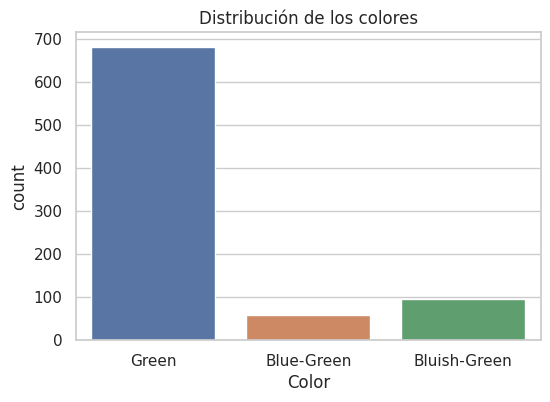

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(6,4))
sns.countplot(x='Color', data=df)
plt.title('Distribución de los colores')
plt.show()

No hay valores faltantes pero si la distribucción de colores no es equitativa

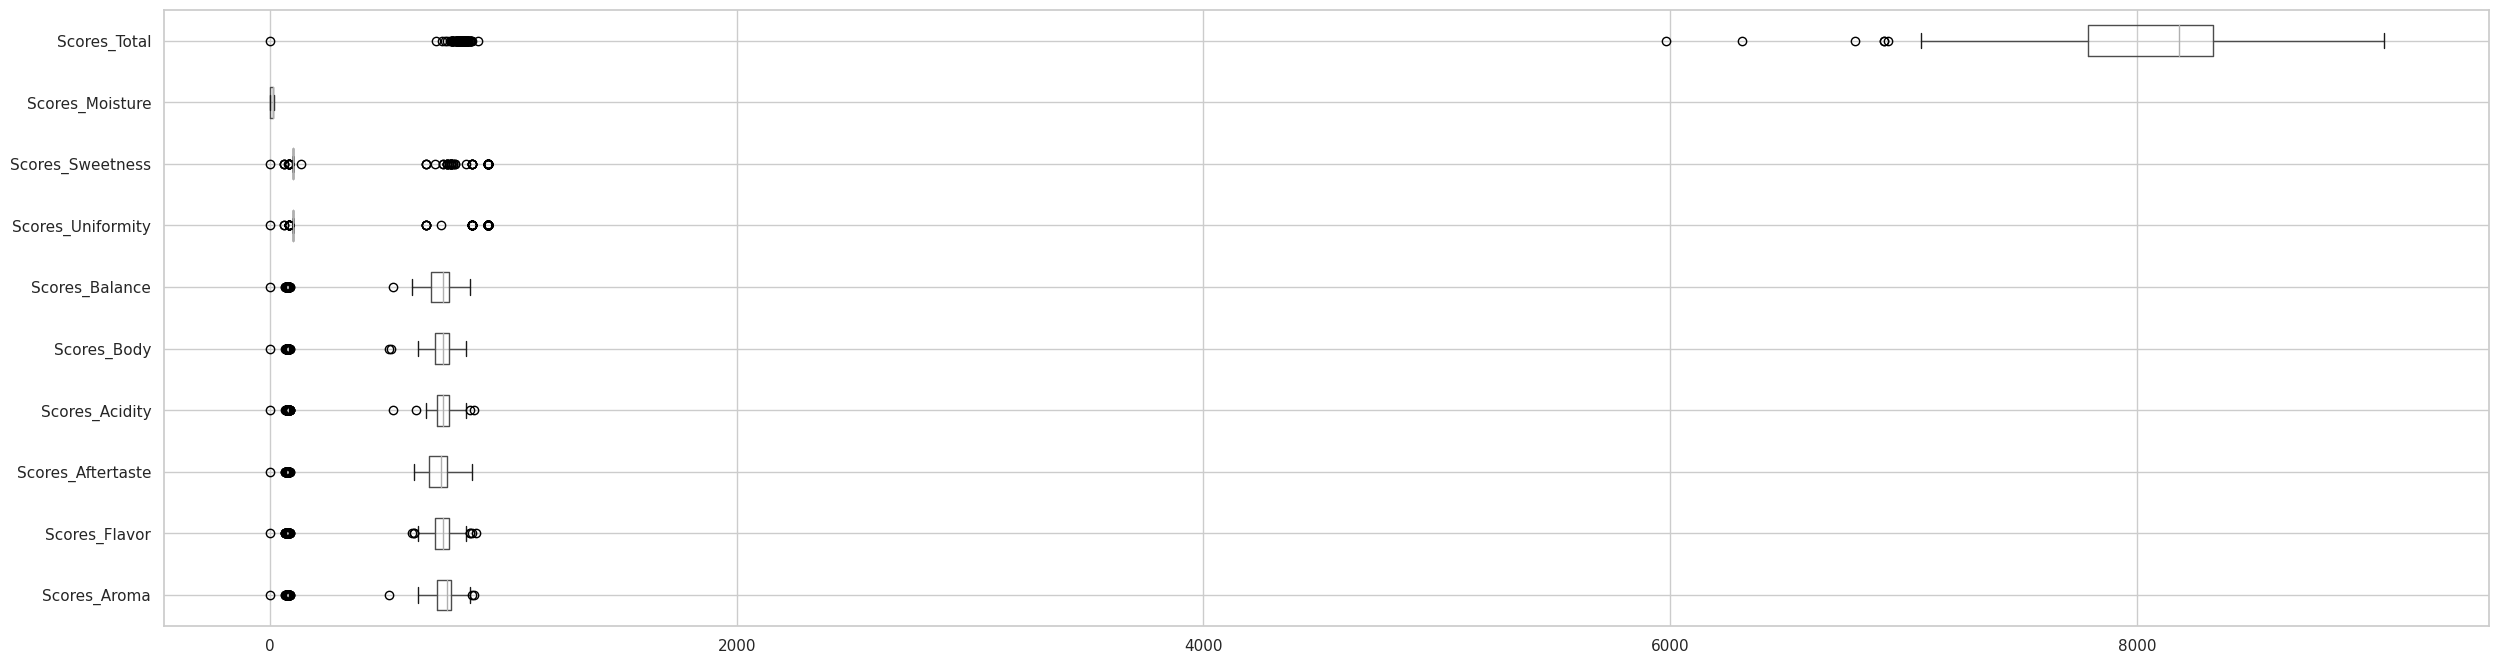

In [ ]:
plt.figure(figsize=(30, 8))
df.boxplot(vert=False)
plt.show()

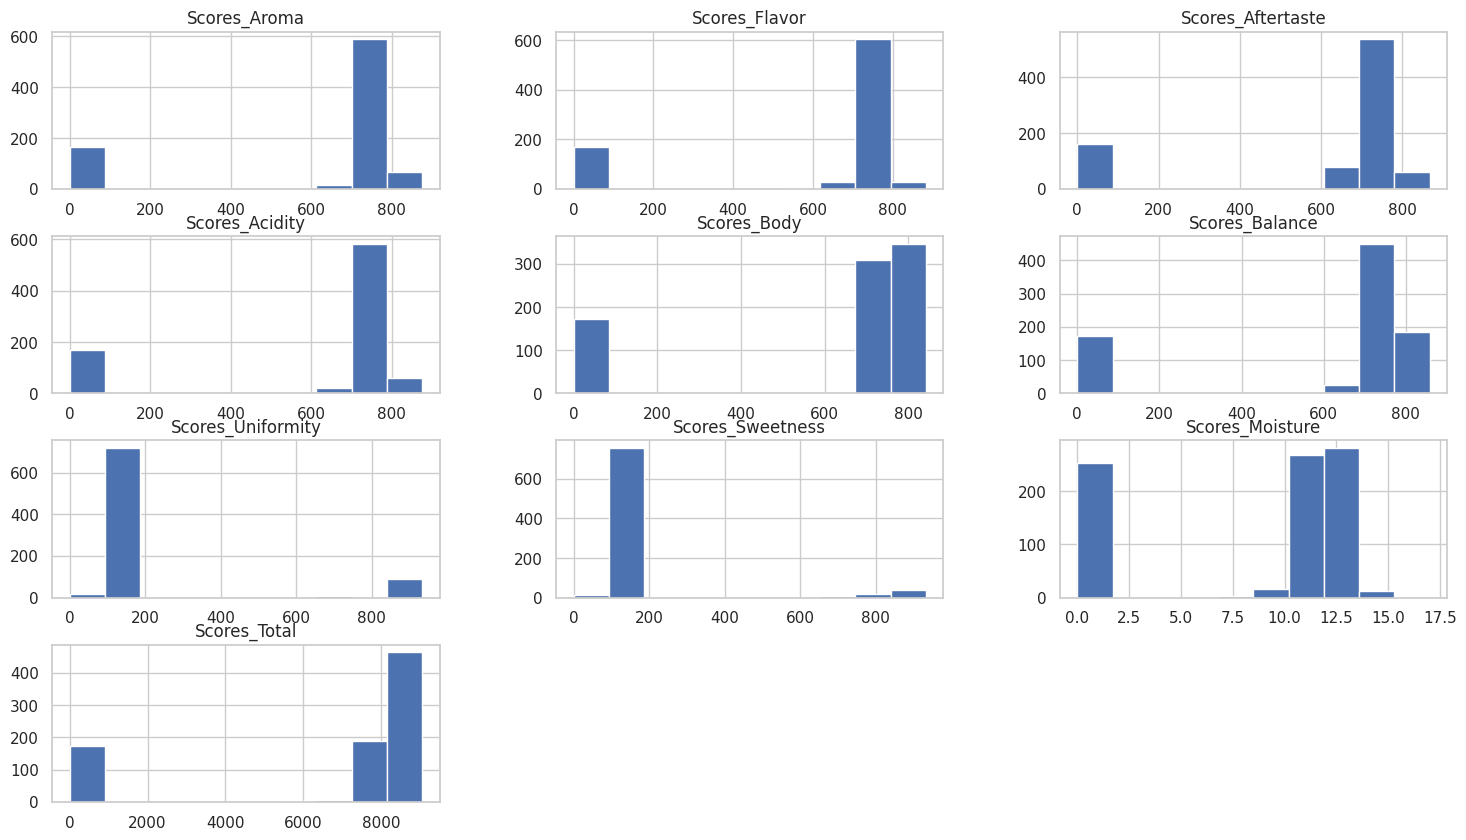

In [ ]:
df.hist(figsize=(18, 10))
plt.show()

#### Estandarización

In [ ]:
col = df[['Scores_Aroma', 'Scores_Flavor', 'Scores_Flavor', 'Scores_Acidity', 'Scores_Body', 'Scores_Balance', 'Scores_Uniformity', 'Scores_Sweetness', 'Scores_Moisture', 'Scores_Total']]
col_std = StandardScaler().fit_transform(col);

In [ ]:
df_std = pd.DataFrame(col_std, columns=['Scores_Aroma', 'Scores_Flavor', 'Scores_Flavor', 'Scores_Acidity', 'Scores_Body', 'Scores_Balance', 'Scores_Uniformity', 'Scores_Sweetness', 'Scores_Moisture', 'Scores_Total'])
df_std['Color'] = df['Color']
df_std

,Scores_Aroma,Scores_Flavor,Scores_Flavor,Scores_Acidity,Scores_Body,Scores_Balance,Scores_Uniformity,Scores_Sweetness,Scores_Moisture,Scores_Total,Color
0,-1.969347,-1.935834,-1.935834,-1.958022,-1.920090,-1.923976,-0.356440,-0.283518,0.735076,0.670908,Green
1,-1.969347,0.734906,0.734906,0.575555,-1.920090,-1.923976,-0.356440,-0.283518,0.735076,0.654273,Green
2,0.765009,-1.954077,-1.954077,-1.958022,0.596194,-1.923976,-0.356440,-0.283518,0.540037,0.642961,Blue-Green
3,-1.987624,-1.954077,-1.954077,0.546392,0.596194,-1.923976,-0.356440,-0.283518,0.540037,0.621003,Blue-Green
4,-1.987624,0.643692,0.643692,0.575555,-1.920090,0.592911,-0.356440,-0.283518,0.540037,0.604368,Green
...,...,...,...,...,...,...,...,...,...,...,...
830,0.490843,-1.990563,-1.990563,0.272984,-1.956295,0.292333,-0.356440,-0.283518,0.540037,0.413066,Green
831,0.490843,0.552478,0.552478,0.455256,0.567230,0.563940,2.623016,3.488903,-1.410356,0.410071,Green
832,-2.280069,-2.245961,-2.245961,-2.249657,-2.209734,-2.213690,-0.744895,-0.775360,0.735076,-2.220914,Green
833,0.523743,0.581667,0.581667,0.546392,0.657744,0.621883,-0.356440,3.120022,-1.410356,-1.946437,Bluish-Green


#### Split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_std.drop('Color', axis=1), df_std['Color'], test_size=0.2, random_state=42)

### SVM con kernel lineal

In [ ]:
# Definición del Modelo
svm_classifier_linear = SVC(kernel='linear', C=1.0)

# Entrenamiento
svm_classifier_linear.fit(x_train, y_train)

# Predicciones
y_pred = svm_classifier_linear.predict(x_test)

# Evaluación
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

  Blue-Green       0.00      0.00      0.00        12
Bluish-Green       0.00      0.00      0.00        20
       Green       0.81      1.00      0.89       135

    accuracy                           0.81       167
   macro avg       0.27      0.33      0.30       167
weighted avg       0.65      0.81      0.72       167



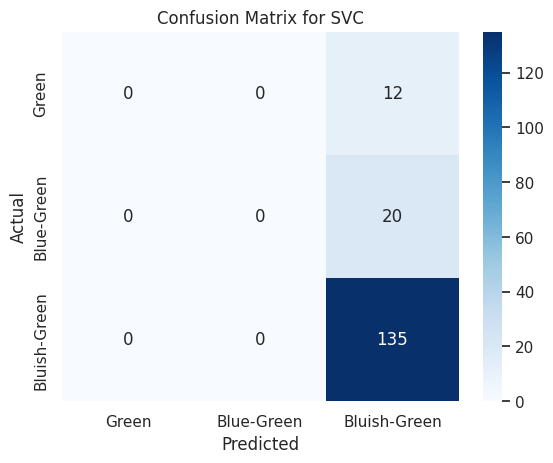

In [ ]:
# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using a heatmap
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=df_std.Color.unique(), yticklabels=df_std.Color.unique())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVC')
plt.show()

#### Optimización

In [ ]:
from sklearn.metrics import make_scorer, f1_score
# Define the F1-score macro average scorer
f1_avg = make_scorer(f1_score, average='macro')

In [ ]:
# Hiperparámetros
param_grid = {'C': [0, 0.001, 0.01, 0.1, 1, 10, 100],
              'decision_function_shape': ['ovr', 'ovo']}

# Entrenar el modelo con GridSearchCV que realizará la validación cruzada
svm_classifier_linear = SVC(kernel='linear')
grid_search = GridSearchCV(svm_classifier_linear, param_grid, cv=5, scoring=f1_avg)
grid_search.fit(x_train, y_train)

# Predicciones
best_svm = grid_search.best_estimator_
y_pred = best_svm.predict(x_test)

# Evaluación
print(f"Mejor hiperparámetro: {grid_search.best_params_}\n")
print(classification_report(y_test, y_pred))

Mejor hiperparámetro: {'C': 0.001, 'decision_function_shape': 'ovr'}

              precision    recall  f1-score   support

  Blue-Green       0.00      0.00      0.00        12
Bluish-Green       0.00      0.00      0.00        20
       Green       0.81      1.00      0.89       135

    accuracy                           0.81       167
   macro avg       0.27      0.33      0.30       167
weighted avg       0.65      0.81      0.72       167



Debido al gran desbalanceo de las clases, podemos ver que una SVM bastante buena es una que clasifica todos los tés en la clase mayoritaria.

Hasta el punto que aún maximizando el promedio de los f1-score, no encontró parámetros para un SVM de kernel lineal que lo mejorasen.

In [ ]:
print("F1", f1_score(y_test, y_pred, average='macro'))

F1 0.2980132450331126


### SVM con kernel Gaussiano

In [ ]:
# Hiperparámetros
params_grid = {'gamma': np.logspace(-3, 3, 7),
                'C': [0, 0.001, 0.01, 0.1, 1, 10, 100],
              'decision_function_shape': ['ovr', 'ovo']}

# Aplicar GS para elegir los mejores hiperparámetros
grid_search = GridSearchCV(SVC(kernel='rbf'), params_grid, cv=5, scoring=f1_avg)
grid_search.fit(x_train, y_train)

# Predicciones
y_pred = grid_search.predict(x_test)

# Evaluación
print(f"Mejores hiperparámetros: {grid_search.best_params_}\n")
print(classification_report(y_test, y_pred))

Mejores hiperparámetros: {'C': 100, 'decision_function_shape': 'ovr', 'gamma': 0.1}

              precision    recall  f1-score   support

  Blue-Green       0.17      0.08      0.11        12
Bluish-Green       0.00      0.00      0.00        20
       Green       0.82      0.94      0.88       135

    accuracy                           0.77       167
   macro avg       0.33      0.34      0.33       167
weighted avg       0.67      0.77      0.72       167



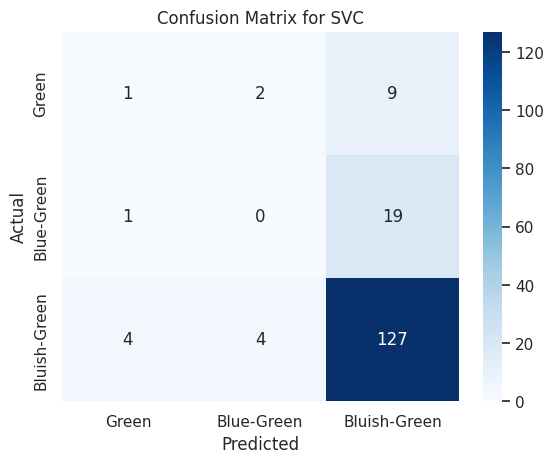

In [ ]:
# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using a heatmap
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=df_std.Color.unique(), yticklabels=df_std.Color.unique())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVC')
plt.show()

Con un modelo con kernel gausiano, sí se encontró un modelo que clasifique los datos del test en las 3 clases de manera que mejoraron el f1 promedio.

In [ ]:
print("F1", f1_score(y_test, y_pred, average='macro'))

F1 0.3289910600255428


### Random forest

In [ ]:
# Hiperparámetros
param_grid = {
    'n_estimators': [15, 20, 25, 100],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3],
    'max_depth': [10, 50, 80, None],
    'max_features': [6, None],
}

# Aplicar GS para elegir los mejores hiperparámetros
random_search = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_iter=100, scoring=f1_avg, random_state=42)
random_search.fit(x_train, y_train)

# Predicciones
y_pred = random_search.predict(x_test)

# Evaluación
print("Number of trials performed:", random_search.n_iter)
print(f"Mejores hiperparámetros: {random_search.best_params_}\n")
print(classification_report(y_test, y_pred))

Number of trials performed: 100
Mejores hiperparámetros: {'n_estimators': 25, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': None}

              precision    recall  f1-score   support

  Blue-Green       0.67      0.17      0.27        12
Bluish-Green       0.00      0.00      0.00        20
       Green       0.82      0.97      0.89       135

    accuracy                           0.80       167
   macro avg       0.50      0.38      0.38       167
weighted avg       0.71      0.80      0.74       167



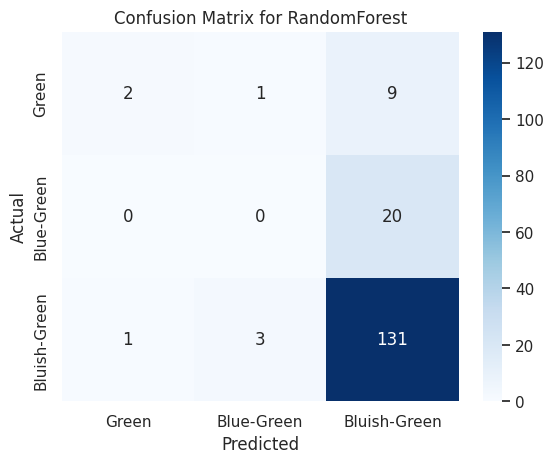

In [ ]:
# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using a heatmap
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=df_std.Color.unique(), yticklabels=df_std.Color.unique())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for RandomForest')
plt.show()

En el caso de los bosques aleatorios pudimos encontrar un bosque con mejores F1 aunque sigue sin predecir ningún té Blue-Green bien.

In [ ]:
print("F1", f1_score(y_test, y_pred, average='macro'))

F1 0.38493408662900186


### Conclusiones

Con este dataset tan desbalanceado, en el caso de querer maximizar el accuracy un modelo que simplemente clasifique la clase mayoritaria puede ser de los mejores que podemos conseguir. Pero si queremos maximizar por ejemplo el f1-score podemos encontrar mejores predictores explorando los hiperparámetros de modelos más y más complejos.

Primero en el caso de los SVM pudimos mejorar las métricas dandole un kernel gaussiano y probando con distintos gammas. Y luego en el caso de los bosques aleatorios, no sólo pudimos explorar los parámetros de los árboles de decisión, sino que también al ser un ensamblador es posible elegir combinaciones de los mismos y que den los mejores valores de F1.

Aún así el modelo seguramente pueda ser mejorado sobre el dataset con más testeo de hiperparámetros o tipos de modelos pero depende de la naturaleza de los datos cuan significativas serían tales mejoras.